In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import math
%matplotlib inline

In [2]:
def rescale_image(image, percent=75):
    width  = int(image.shape[1] * percent/ 100)
    height = int(image.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation =cv2.INTER_AREA)

## Get features of the 5 objects

In [3]:
methode = "orb"

./data/img/lunette/lunette1.jpg
./data/img/lunette/lunette2.jpg
./data/img/lunette/lunette3.jpg
./data/img/lunette/lunette4.jpg
./data/img/lunette/lunette5.jpg
./data/img/lunetteg/lunetteg1.jpg
./data/img/lunetteg/lunetteg2.jpg
./data/img/lunetteg/lunetteg3.jpg
./data/img/lunetteg/lunetteg4.jpg
./data/img/lunetteg/lunetteg5.jpg
./data/img/phone/phone1.jpg
./data/img/phone/phone2.jpg
./data/img/phone/phone3.jpg
./data/img/phone/phone4.jpg
./data/img/phone/phone5.jpg
./data/img/tasse/tasse1.jpg
./data/img/tasse/tasse2.jpg
./data/img/tasse/tasse3.jpg
./data/img/tasse/tasse4.jpg
./data/img/tasse/tasse5.jpg
./data/img/tasse/tasse6.jpg
./data/img/tasseg/tasseg1.jpg
./data/img/tasseg/tasseg2.jpg
./data/img/tasseg/tasseg3.jpg
./data/img/tasseg/tasseg4.jpg
./data/img/tasseg/tasseg5.jpg


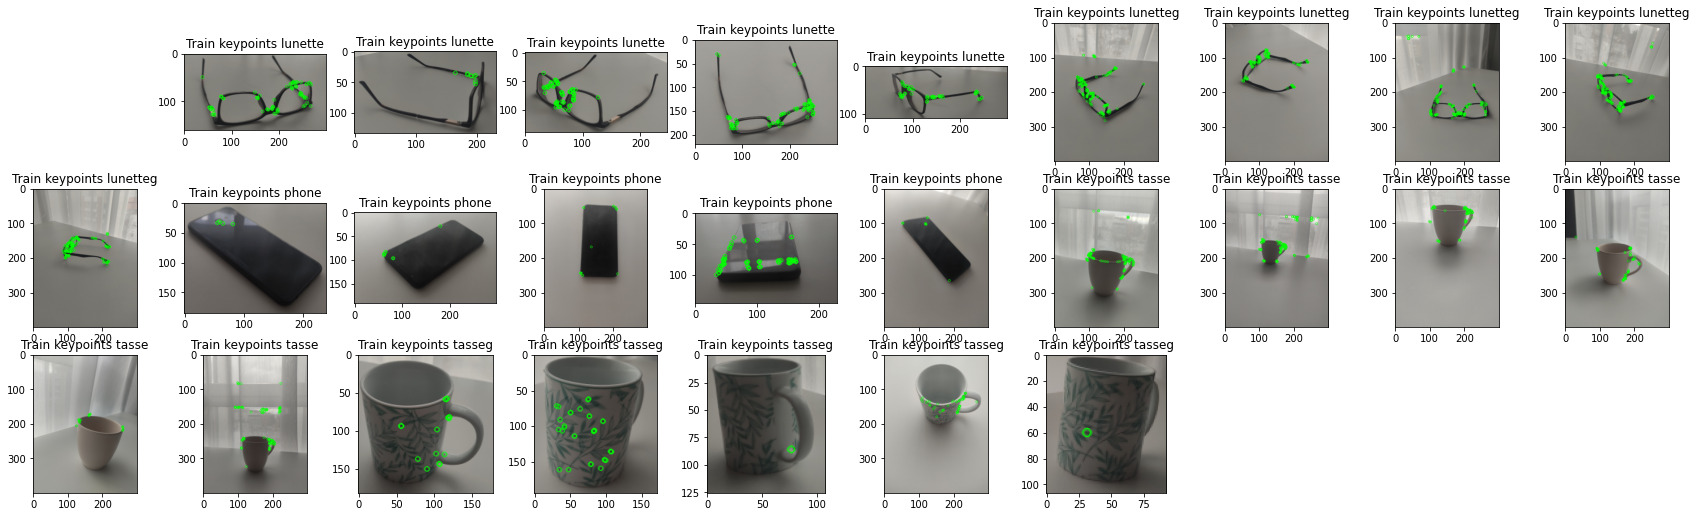

In [4]:
directory = './data/img'
i = 1

train_images      = dict()
train_descriptors = dict()
train_keypointss  = dict()

plt.figure(figsize=(30,30))

orb = cv2.ORB_create()
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING)

sift = cv2.SIFT_create()
bf_sift = cv2.BFMatcher()

if methode == "orb":
    algo = orb
    bf   = bf_orb
else:
    algo = sift
    bf   = bf_sift

for item in os.listdir(directory):
    if os.path.isdir(directory + '/' + item):
        
        train_images[item]      = list()
        train_descriptors[item] = list()
        train_keypointss[item]  = list()
        
        for file in os.listdir(directory + '/' + item):
            filename = os.fsdecode(file)
            
            if filename.endswith(".jpg"):
                print(directory + '/' + item + '/' + filename)
                image = cv2.imread(directory + '/' + item + '/' + filename)
                image = rescale_image(image, percent=10)
                training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                training_gray  = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
                
                (train_images[item]).append(training_gray)
                
                train_keypoints, train_descriptor = algo.detectAndCompute(training_gray, None)
                (train_descriptors[item]).append(train_descriptor)
                (train_keypointss[item]).append(train_keypoints)
                
                i +=1
        
                keypoints_without_size = np.copy(training_image)
                plt.subplot(10,10,i)
                cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
                plt.imshow(keypoints_without_size, cmap='gray')
                plt.title("Train keypoints " + item)

In [5]:
type(train_descriptors["tasseg"][2])

numpy.ndarray

In [6]:
def analyzeframe(frame, train_descriptors, orb, bf):
    # get orb features 
    frame_keypoints, frame_descriptor = orb.detectAndCompute(frame, None)
    
    # compare the distance between the frame descriptor & the training descriptors
    distanceg = math.inf
    result    = ""
    matches_res = list()
    
    for item in train_descriptors:
        i = 0
        while i < (len(train_descriptors[item])):
            if train_descriptors[item][i] is not None:
                matches = bf.match(frame_descriptor, train_descriptors[item][i])
                matches = sorted(matches, key = lambda x : x.distance)
                #print("ok" + item + ";" + str(i))
                distance = 0
                for m in matches:
                    distance = distance + m.distance
            
                
                if distance < distanceg:
                    distanceg = distance
                    result    = item
                    matches_res = matches
                    pos         = i
            i += 1
            
    return result, pos, matches_res, frame_keypoints  

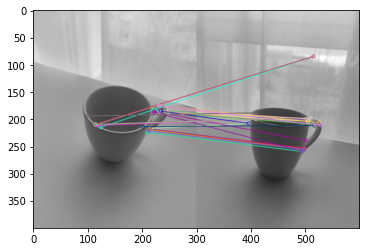

In [7]:
frame = cv2.imread("./test1.jpg")
frame = rescale_image(frame, percent=10)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame_gray  = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create()
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING)

sift = cv2.SIFT_create()
bf_sift = cv2.BFMatcher()

if methode == "orb":
    algo = orb
    bf   = bf_orb
else:
    algo = sift
    bf   = bf_sift


result, pos, matches_res, frame_keypoints = analyzeframe(frame_gray, train_descriptors, algo, bf)


x = cv2.drawMatches(frame_gray, frame_keypoints, train_images[result][pos], train_keypointss[result][pos], matches_res, None, flags=2)

plt.imshow(x)
plt.show()

In [ ]:
cap = cv2.VideoCapture('./data/videos/video1_lowres.mp4')

video_crop = 0

orb = cv2.ORB_create()
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING)

sift = cv2.SIFT_create()
bf_sift = cv2.BFMatcher()

if methode == "orb":
    algo = orb
    bf   = bf_orb
else:
    algo = sift
    bf   = bf_sift
    
if (cap.isOpened()== False):
    print("Error opening video stream or file")

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == False:
        break
    else:
        frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_gray  = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        
        if video_crop:
            frame_gray = frame_gray[80:220,120:360]
        
        result, pos, matches_res, frame_keypoints = analyzeframe(frame_gray, train_descriptors, algo, bf)
        x = cv2.drawMatches(frame_gray, frame_keypoints, train_images[result][pos], train_keypointss[result][pos], matches_res, None, flags=2)

        cv2.imshow(methode,x)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
        
        
cap.release()
cv2.destroyAllWindows()